In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a reference the CSV file desired
enrollment_csv = "Enrollment -- 12-Month Enrollment Rates 2001-17/Comprehensive 12-Month Enrollment Rates 2001-17.csv"

# Read the CSV into a Pandas DataFrame
enrollment_df = pd.read_csv(enrollment_csv)

# Print the first five rows of data to the screen
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total,IDX_EF
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0,-2.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0,-2.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0,-2.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0,-2.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0,-2.0


In [3]:
# How many institutions are we starting with?
totalInstitutions = len(enrollment_df)
print(totalInstitutions)

90267


In [4]:
# Delete columns that we're not interested in (The variable IDX_EF contains the UNITID of the parent institution.)
enrollment_df = enrollment_df.drop(["IDX_EF"], axis=1)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0


In [5]:
# Remove the rows with missing data
enrollment_df = enrollment_df.dropna(how="any")
institutionsMinusBlanks = len(enrollment_df)
print(institutionsMinusBlanks)

90250


In [6]:
# How many institutions had data that wasn't incuded?
instutionsWithoutData = (totalInstitutions - institutionsMinusBlanks)
print(instutionsWithoutData)

17


In [7]:
#As type to change the years type to get rid of those pesky .0 and replace the current year column with this new clean one
enrollment_df["year"]=enrollment_df["year"].astype(int)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001,Undergraduate,6529.0
3,100724,Alabama State University,2001,Undergraduate,5228.0
4,100751,The University of Alabama,2001,Undergraduate,16983.0


In [8]:
# Count how many Institution entries do we have per year
InstitutionYearCounts = enrollment_df["year"].value_counts()
InstitutionYearCounts = InstitutionYearCounts.sort_values(axis=0, ascending=True)
print(InstitutionYearCounts)

2001    4253
2002    4522
2003    4604
2004    4682
2005    4762
2006    4841
2007    4910
2008    5025
2009    5176
2010    5409
2011    5607
2012    5751
2013    5891
2014    6038
2015    6174
2016    6275
2017    6330
Name: year, dtype: int64


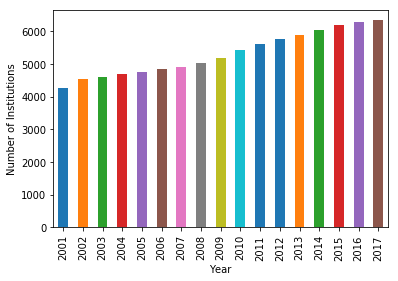

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a bar chart based off of the group series from before
institutionCountBar = InstitutionYearCounts.plot(kind='bar')

# Set the xlabel and ylabel using class methods
institutionCountBar.set_xlabel("Year")
institutionCountBar.set_ylabel("Number of Institutions")


plt.show()
plt.tight_layout()

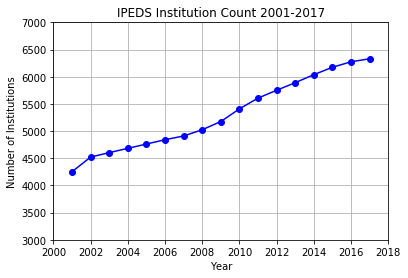

In [10]:
institutionCountLine = InstitutionYearCounts.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCountLine.set_ylim(ymin=3000, ymax=7000)
institutionCountLine.set_xlim(xmin=2000, xmax=2018)
plt.title("IPEDS Institution Count 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()
plt.savefig("Institution Count 2001-2017_fig.png")

In [11]:
#Total enrollment numbers between 2001 and 2017 = sum EF2001D1.Grand total per year
pd.to_numeric(enrollment_df['EF2001D1.Grand total'])
enrollment_df.dtypes
totalEnrollment = enrollment_df["EF2001D1.Grand total"].sum()
totalEnrollment

365252506.0

In [12]:
#Loop through years and add EF2001D1.Grand total if years match?


enrollmentByYear = enrollment_df.groupby("year")
enrollmentByYear = enrollmentByYear.agg(sum)
enrollmentByYear

,EF2001D1.Grand total
year,
2001,17965501.0
2002,18774604.0
2003,19385482.0
2004,19493543.0
2005,19792638.0
2006,19957444.0
2007,20240347.0
2008,20714313.0
2009,21913240.0


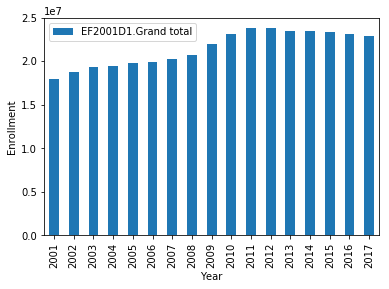

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a bar chart based off of the group series from before
enrollmentByYearBar = enrollmentByYear.plot(kind='bar')

# Set the xlabel and ylabel using class methods
enrollmentByYearBar.set_xlabel("Year")
enrollmentByYearBar.set_ylabel("Enrollment")


plt.show()
plt.tight_layout()

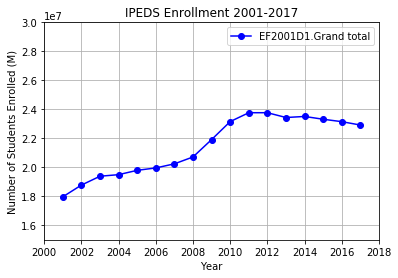

In [14]:
enrollmentByYearLine = enrollmentByYear.plot.line(style='.-', marker ='o', color='blue')
enrollmentByYearLine.set_ylim(ymin=15000000, ymax=30000000)
enrollmentByYearLine.set_xlim(xmin=2000, xmax=2018)
plt.title("IPEDS Enrollment 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Students Enrolled (M)")
plt.grid()
plt.savefig("Enrollment Count 2001-2017_fig.png")

In [15]:
#Rate of change
#creating list for data series to calc annual change
enrollmentRate=enrollmentByYear["EF2001D1.Grand total"]
enrollmentRate

# create list to append annual rates of change to
enrollmentRateOfChange = []
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=17965501
#the above needs to be the first value in your list (index location 0)

for rate in enrollmentRate:
    try:
        change=((rate/start_rate)-1)*100
        enrollmentRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

enrollmentByYear["Enrollment Annual Rate of Change"]=enrollmentRateOfChange

enrollmentByYear


,EF2001D1.Grand total,Enrollment Annual Rate of Change
year,,
2001,17965501.0,0.000000
2002,18774604.0,4.503648
2003,19385482.0,3.253746
2004,19493543.0,0.557433
2005,19792638.0,1.534329
2006,19957444.0,0.832663
2007,20240347.0,1.417531
2008,20714313.0,2.341689
2009,21913240.0,5.787916


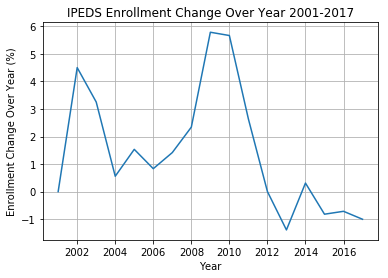

In [16]:
xenrol=enrollmentByYear.index
yenrol=enrollmentByYear["Enrollment Annual Rate of Change"]
plt.plot(xenrol,yenrol)
plt.plot(x_compat=True)
plt.title("IPEDS Enrollment Change Over Year 2001-2017")
plt.xlabel("Year")
plt.ylabel("Enrollment Change Over Year (%)")
plt.grid()
plt.savefig("Enrollment Rate of Change 2001-2017_fig.png")


In [17]:
InstitutionYearCounts

2001    4253
2002    4522
2003    4604
2004    4682
2005    4762
2006    4841
2007    4910
2008    5025
2009    5176
2010    5409
2011    5607
2012    5751
2013    5891
2014    6038
2015    6174
2016    6275
2017    6330
Name: year, dtype: int64

In [18]:
institutiondf = pd.DataFrame({'year':InstitutionYearCounts.index, 'list':InstitutionYearCounts.values})
institutiondf

,year,list
0,2001,4253
1,2002,4522
2,2003,4604
3,2004,4682
4,2005,4762
5,2006,4841
6,2007,4910
7,2008,5025
8,2009,5176
9,2010,5409


In [19]:
#Rate of change
#creating list for data series to calc annual change
institutionRate=institutiondf["list"]
institutionRate

# create list to append annual rates of change to
institutionRateOfChange = []
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=4253
#the above needs to be the first value in your list (index location 0)

for rate in institutionRate:
    try:
        change=((rate/start_rate)-1)*100
        institutionRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

institutiondf["Institution Annual Rate of Change"]=institutionRateOfChange

institutiondf

,year,list,Institution Annual Rate of Change
0,2001,4253,0.000000
1,2002,4522,6.324947
2,2003,4604,1.813357
3,2004,4682,1.694179
4,2005,4762,1.708672
5,2006,4841,1.658967
6,2007,4910,1.425325
7,2008,5025,2.342159
8,2009,5176,3.004975
9,2010,5409,4.501546


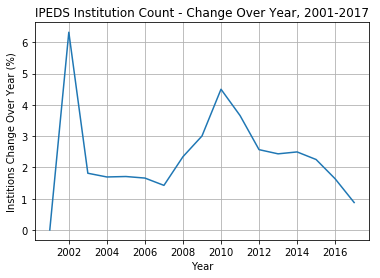

In [21]:
xinst=institutiondf["year"]
yinst=institutiondf["Institution Annual Rate of Change"]
plt.plot(xinst,yinst)
plt.plot(x_compat=True)
plt.title("IPEDS Institution Count - Change Over Year, 2001-2017")
plt.xlabel("Year")
plt.ylabel("Institions Change Over Year (%)")
plt.grid()
plt.savefig("Institution Count Rate of Change 2001-2017_fig.png")
